In [1]:
print("Trabajo Practico N°4: LBP")
#Para mostrar las imagenes en ventanas emergentes saca el inline
%matplotlib inline

#Agregamos numpy para usar OpenCV
import numpy as np
#Agregamos cv2 para acceder a OpenCV
import cv2 as cv
#Agregamos para ver los graficos
import matplotlib.pyplot as plt

Trabajo Practico N°4: LBP


In [2]:
def plot_fig(img, fsize = (8, 8)):
    fig = plt.figure(figsize = fsize, dpi = 130)
    if len(img) == 1:
        img1=plt.subplot(111)
        img1.imshow(img[0], cmap='gray')
    if len(img) == 2:
        img1=plt.subplot(121)
        img1.imshow(img[0], cmap='gray')
        img2=plt.subplot(122)
        img2.imshow(img[1], cmap='gray')

In [69]:
def plot_hist(img):
    fig = plt.figure(figsize = (8,8), dpi = 130)
    if len(img) == 1:
        hist = cv.calcHist([img[0]],[0],None,[256],[0,256])
        hist = cv.normalize(hist,hist)
        fig, ax1 = plt.subplots(1)
        fig = plt.figure(figsize = (8,8), dpi = 130)
        ax1.plot(hist)
        
    if len(img) == 2:
        hist1 = cv.calcHist([img[0]],[0],None,[256],[0,256])
        hist1 = cv.normalize(hist1,hist1)
        hist2 = cv.calcHist([img[1]],[0],None,[256],[0,256])
        hist2 = cv.normalize(hist2,hist2)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.plot(hist1)
        ax2.plot(hist2)


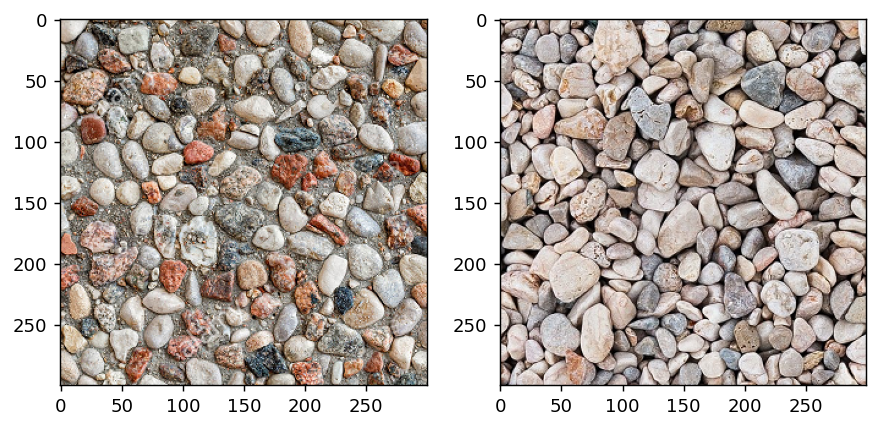

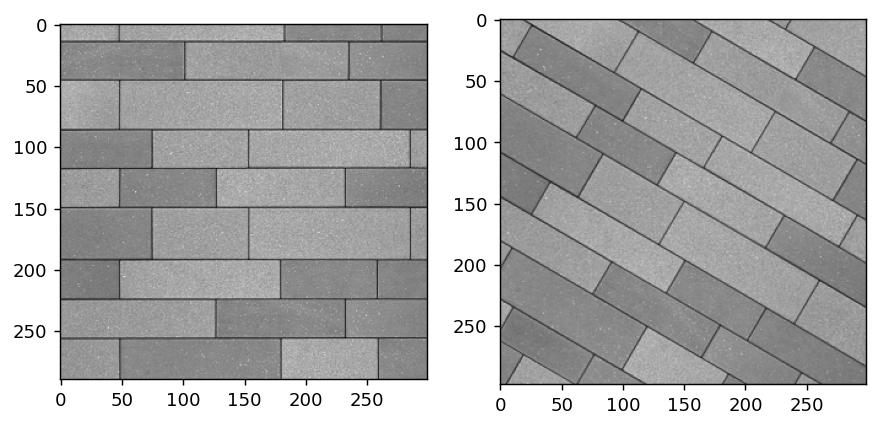

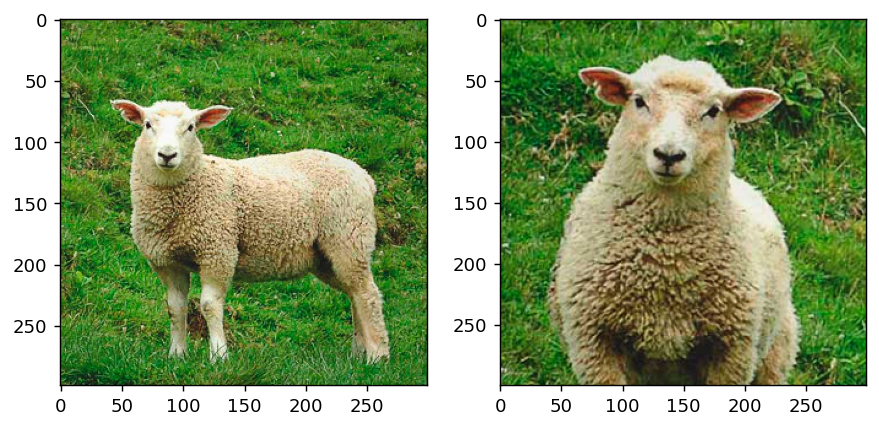

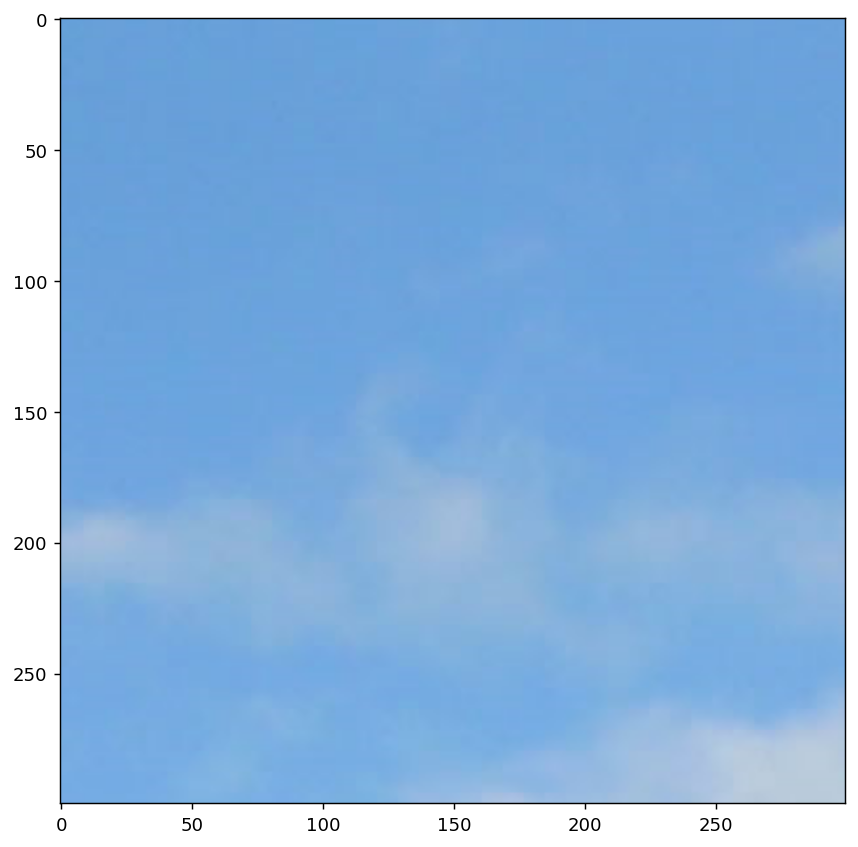

In [71]:
#Cargamos las imagenes
rock1 = cv.imread('piedras1.png')
rock1 = cv.cvtColor(rock1, cv.COLOR_BGR2RGB)
rock2 = cv.imread('piedras2.png')
rock2 = cv.cvtColor(rock2, cv.COLOR_BGR2RGB)
wall1 = cv.imread('ladrillos1.png')
wall1 = cv.cvtColor(wall1, cv.COLOR_BGR2RGB)
wall2 = cv.imread('ladrillos2.png')
wall2 = cv.cvtColor(wall2, cv.COLOR_BGR2RGB)
sky = cv.imread('cielo.png')
sky = cv.cvtColor(sky, cv.COLOR_BGR2RGB)
dolly1 = cv.imread('oveja1.png')
dolly1 = cv.cvtColor(dolly1, cv.COLOR_BGR2RGB)
dolly2 = cv.imread('oveja2.png')
dolly2 = cv.cvtColor(dolly2, cv.COLOR_BGR2RGB)

plot_fig([rock1, rock2])
plot_fig([wall1, wall2])
plot_fig([dolly1, dolly2])
plot_fig([sky])

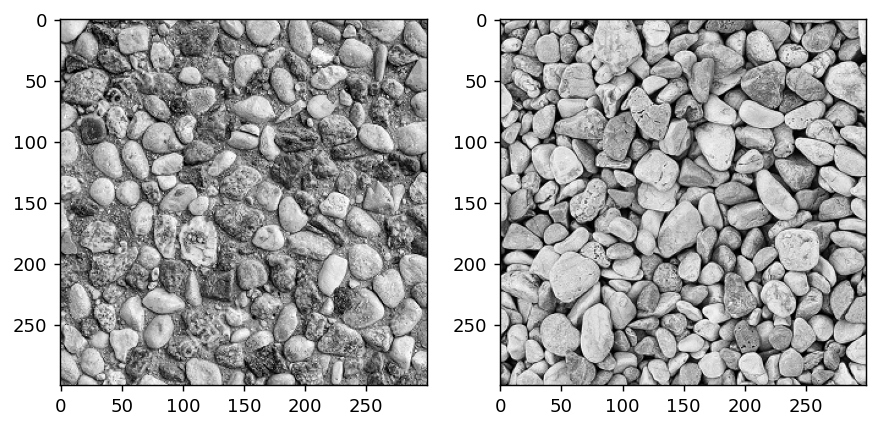

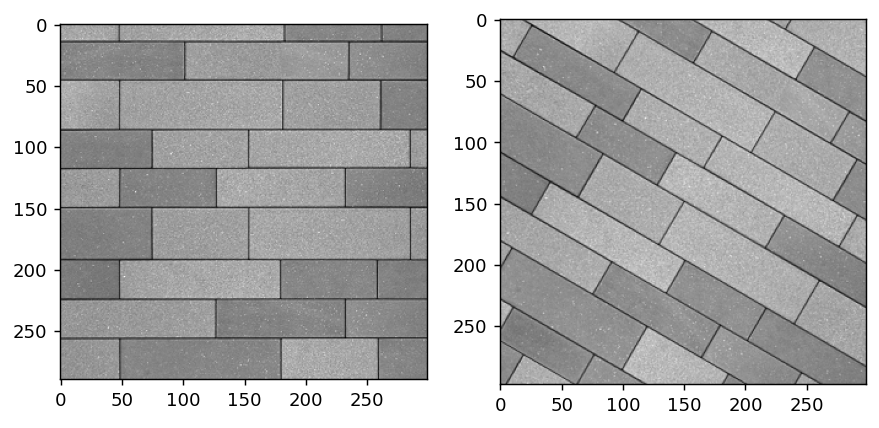

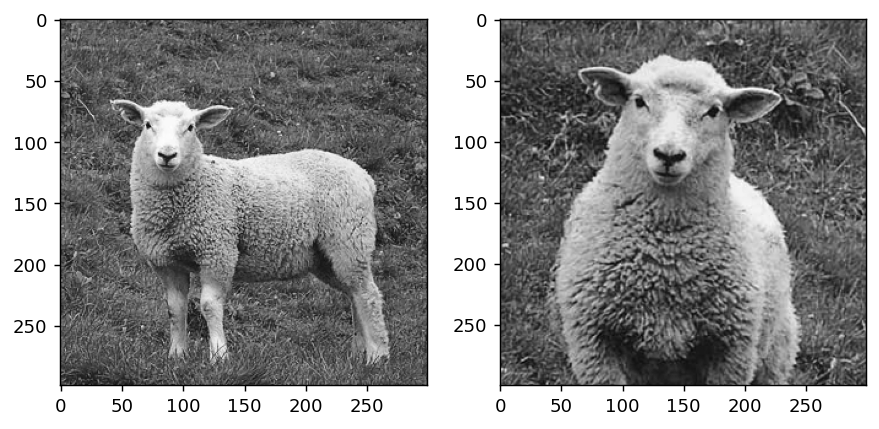

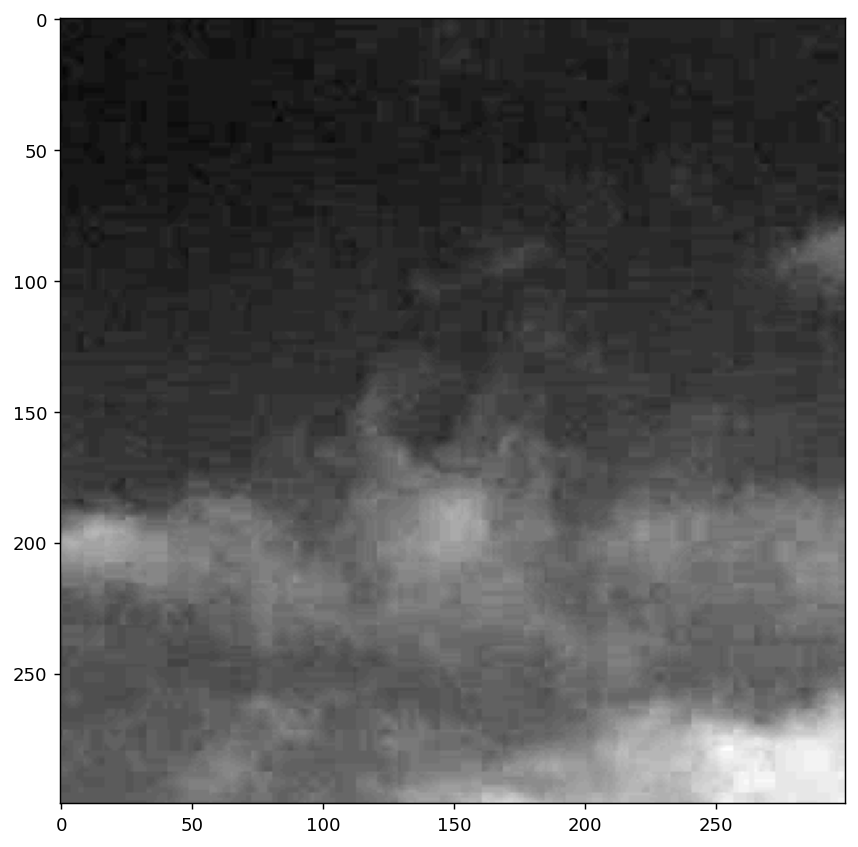

In [72]:
#Pasamos a escala de grises las imagenes
rock1_gray = cv.cvtColor(rock1, cv.COLOR_BGR2GRAY)
rock2_gray = cv.cvtColor(rock2, cv.COLOR_BGR2GRAY)
wall1_gray = cv.cvtColor(wall1, cv.COLOR_BGR2GRAY)
wall2_gray = cv.cvtColor(wall2, cv.COLOR_BGR2GRAY)
sky_gray = cv.cvtColor(sky, cv.COLOR_BGR2GRAY)
dolly1_gray = cv.cvtColor(dolly1, cv.COLOR_BGR2GRAY)
dolly2_gray = cv.cvtColor(dolly2, cv.COLOR_BGR2GRAY)

plot_fig([rock1_gray, rock2_gray])
plot_fig([wall1_gray, wall2_gray])
plot_fig([dolly1_gray, dolly2_gray])
plot_fig([sky_gray])

In [6]:
#Analizo los piixeles vecinos
def get_pixel(img, center, x, y):
    #Por defecto el valor del pixel es menos al del centro
    new_value = 0
      
    try:
        #Analiza si es mayor o igual el valor del vecino
        if img[x][y] >= center:
            new_value = 1
              
    except:
        #En caso de encontrarnos en un borde donde el pixel devuelve null saltamos este paso
        pass
      
    return new_value

In [7]:
#Implemetamos el algoritmo LBP
def lbp_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # Arriba-Izquierda
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # Arriba
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # Arriba-Derecha
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # Derecha
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # Abajo-Derecha
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # Abajo
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # Abajo-Izquierda
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # Izquierda
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Convertimos el calor binario a decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [8]:
#Calculamos Height y Width de cada imagen y creamos una array para LBP
def lbp_ini(img_gray):
    height, width = img_gray.shape
    img_LBP = np.zeros((height, width), np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            img_LBP[i, j] = lbp_pixel(img_gray, i, j)
            
    return img_LBP


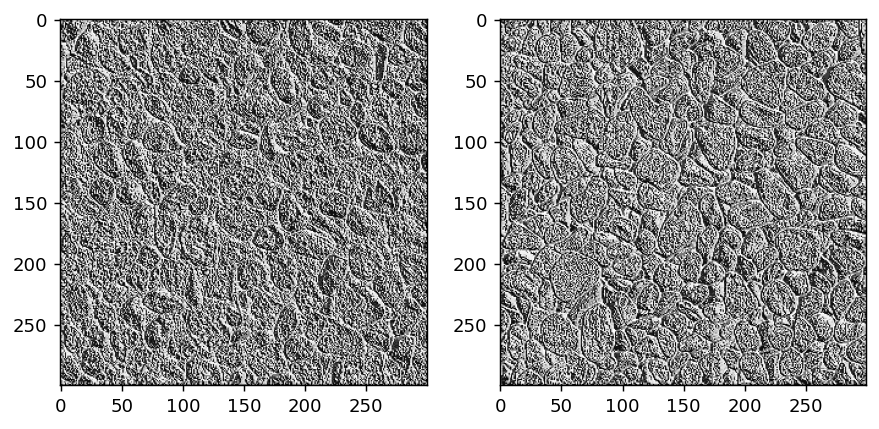

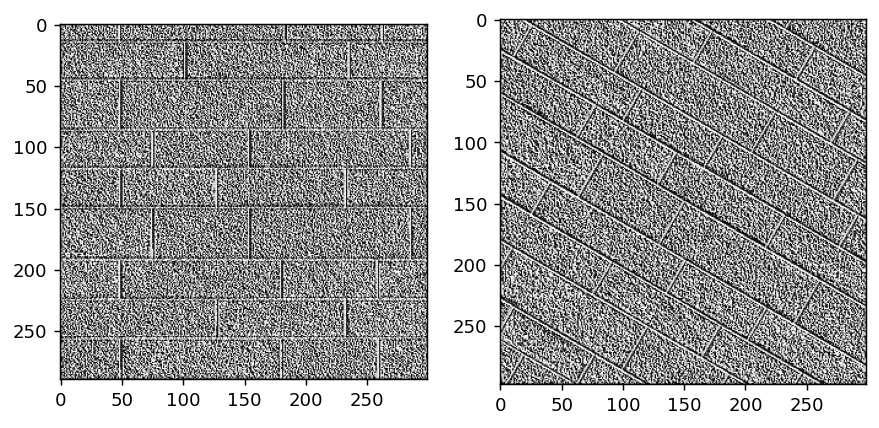

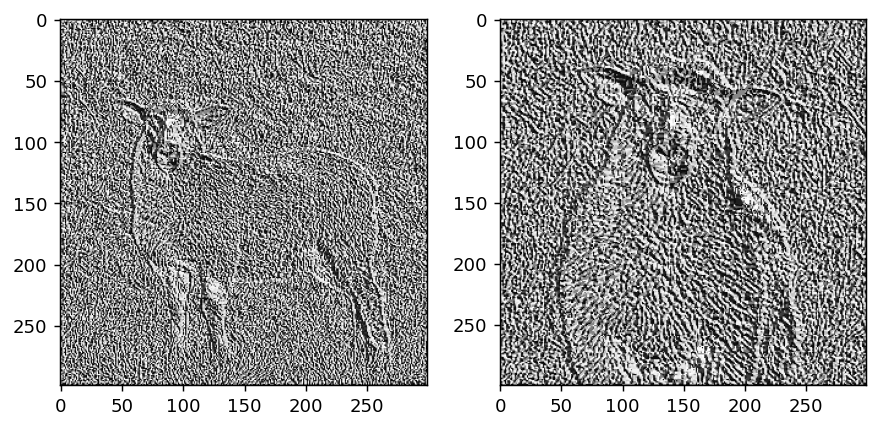

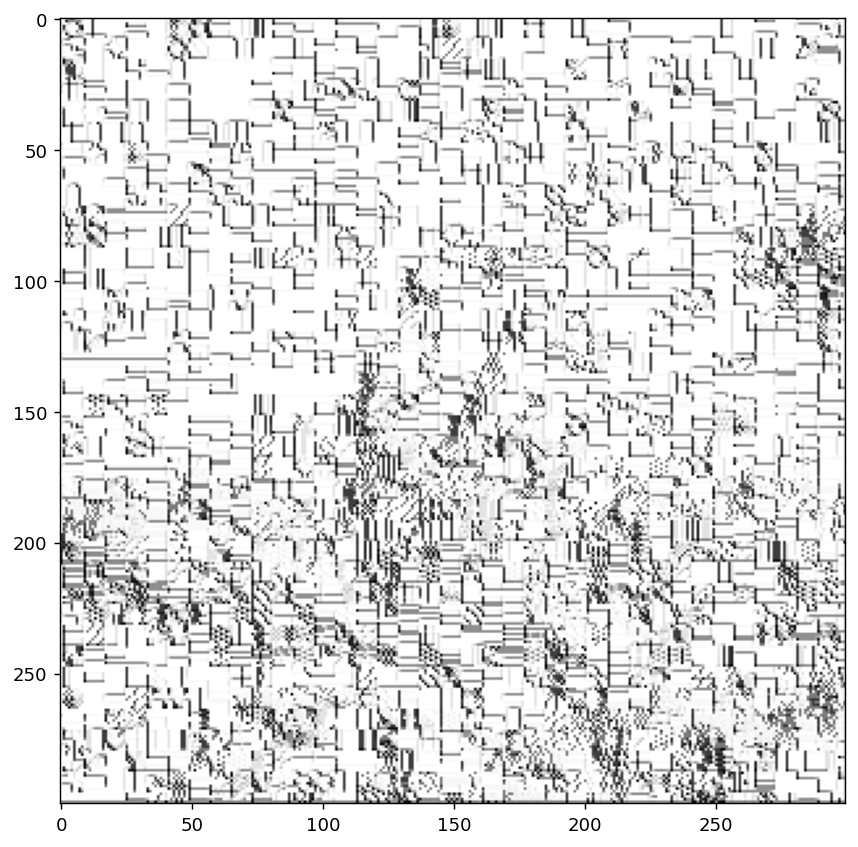

In [73]:
#Calculamos LBP para cada imagen e imprimimos
rock1_LBP = lbp_ini(rock1_gray)
rock2_LBP = lbp_ini(rock2_gray)
wall1_LBP = lbp_ini(wall1_gray)
wall2_LBP = lbp_ini(wall2_gray)
sky_LBP = lbp_ini(sky_gray)
dolly1_LBP = lbp_ini(dolly1_gray)
dolly2_LBP = lbp_ini(dolly2_gray)

plot_fig([rock1_LBP, rock2_LBP])
plot_fig([wall1_LBP, wall2_LBP])
plot_fig([dolly1_LBP, dolly2_LBP])
plot_fig([sky_LBP])

<Figure size 1040x1040 with 0 Axes>

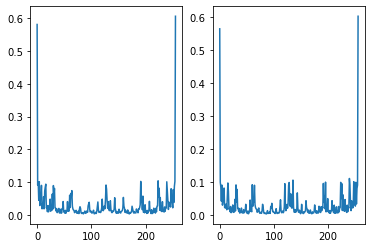

<Figure size 1040x1040 with 0 Axes>

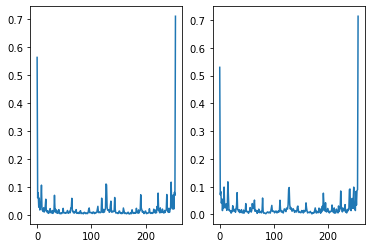

<Figure size 1040x1040 with 0 Axes>

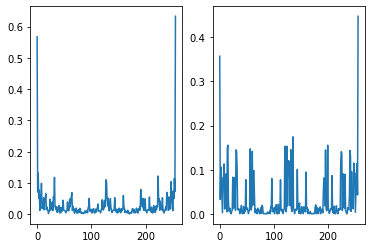

<Figure size 1040x1040 with 0 Axes>

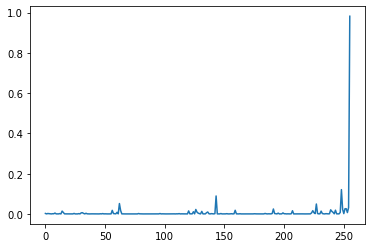

<Figure size 1040x1040 with 0 Axes>

In [75]:
#Calculamos el histograma de cada imagen e imprimimos

plot_hist([rock1_LBP, rock2_LBP])
plot_hist([wall1_LBP, wall2_LBP])
plot_hist([dolly1_LBP, dolly2_LBP])
plot_hist([sky_LBP])